# With Logistic Regression

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
att = pd.read_csv(r"C:\Users\vidhiandshruti\Downloads\Attrition11.csv") #reading file

In [3]:
att.shape

(1470, 35)

In [4]:
att.head(10) #to check is file is read or not

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
att.isnull().sum()   #checking number of nulls in file

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
att.describe( include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
from sklearn.preprocessing import LabelEncoder      #converting non-numeric to numeric

In [9]:
le=LabelEncoder()

In [10]:
att[att.select_dtypes(include=['object']).columns]  = att[att.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [11]:
att.info()          #to check if converted or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [12]:
att.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,...,2,80,2,17,3,2,7,7,7,7


In [13]:
att_x=att.drop(['Attrition'], axis=1)   #splitting x and y

In [14]:
att_y=att.Attrition

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
att.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [17]:
att_train_x,att_test_x,att_train_y,att_test_y = train_test_split(att_x,att_y, test_size=.2, random_state=101)

In [18]:
att_x.shape

(1470, 34)

In [19]:
att_y.shape

(1470,)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel =LogisticRegression()       # creating an object

In [22]:
logmodel.fit(att_train_x ,att_train_y) #model created

C:\Users\vidhiandshruti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred=logmodel.predict(att_test_x)   # prediction at actual classes

In [24]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix            # creating confusion matrix

In [26]:
tab_att = confusion_matrix( pred, att_test_y)

In [27]:
tab_att

array([[244,  38],
       [  5,   7]], dtype=int64)

In [28]:
Accuracy_1 = tab_att.diagonal().sum()/tab_att.sum()      #Accuracy before Class Balancing

In [29]:
Accuracy_1

0.8537414965986394

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt=DecisionTreeClassifier(class_weight ="balanced")

In [32]:
dt.fit(att_train_x,att_train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
dt_pred=dt.predict(att_test_x)

In [34]:
tab_att2=confusion_matrix(dt_pred,att_test_y)

In [35]:
tab_att2

array([[220,  37],
       [ 29,   8]], dtype=int64)

In [36]:
Accuracy_2=tab_att2.diagonal().sum()/tab_att2.sum()   #Accuracy after Class Balancing

In [37]:
Accuracy_2

0.7755102040816326

In [38]:
pred_prob=logmodel.predict_proba(att_test_x) # prediction on values of probability

In [39]:
pred_prob

array([[0.93393779, 0.06606221],
       [0.91960442, 0.08039558],
       [0.94451796, 0.05548204],
       [0.62529715, 0.37470285],
       [0.99280691, 0.00719309],
       [0.91113938, 0.08886062],
       [0.52715084, 0.47284916],
       [0.9426421 , 0.0573579 ],
       [0.8939485 , 0.1060515 ],
       [0.99756156, 0.00243844],
       [0.97681452, 0.02318548],
       [0.60661805, 0.39338195],
       [0.92120744, 0.07879256],
       [0.86746296, 0.13253704],
       [0.81933297, 0.18066703],
       [0.86253563, 0.13746437],
       [0.82979861, 0.17020139],
       [0.84929802, 0.15070198],
       [0.88774054, 0.11225946],
       [0.93113438, 0.06886562],
       [0.8979446 , 0.1020554 ],
       [0.90556458, 0.09443542],
       [0.78252272, 0.21747728],
       [0.75080826, 0.24919174],
       [0.90394789, 0.09605211],
       [0.94488584, 0.05511416],
       [0.89833961, 0.10166039],
       [0.7085819 , 0.2914181 ],
       [0.83497676, 0.16502324],
       [0.99299067, 0.00700933],
       [0.

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(pred,att_test_y))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       282
           1       0.16      0.58      0.25        12

    accuracy                           0.85       294
   macro avg       0.57      0.72      0.58       294
weighted avg       0.95      0.85      0.89       294



In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
log_roc_auc=roc_auc_score(att_test_y,pred)

In [44]:
log_roc_auc                       #AUROC Value

0.5677376171352073

In [45]:
pred_prob_df=pd.DataFrame(pred_prob)

In [46]:
pred_prob_df

,0,1
0,0.933938,0.066062
1,0.919604,0.080396
2,0.944518,0.055482
3,0.625297,0.374703
4,0.992807,0.007193
...,...,...
289,0.846373,0.153627
290,0.964349,0.035651
291,0.835986,0.164014
292,0.900790,0.099210


In [47]:
fpr,tpr,threshold =roc_curve(att_test_y, pred_prob_df.iloc[:,1])

In [48]:
fpr

array([0.        , 0.        , 0.        , 0.01204819, 0.01204819,
       0.01606426, 0.01606426, 0.02008032, 0.02008032, 0.02811245,
       0.02811245, 0.04819277, 0.04819277, 0.05220884, 0.05220884,
       0.0562249 , 0.0562249 , 0.06425703, 0.06425703, 0.12449799,
       0.12449799, 0.13654618, 0.13654618, 0.15261044, 0.15261044,
       0.21285141, 0.21285141, 0.22088353, 0.22088353, 0.2248996 ,
       0.2248996 , 0.24497992, 0.24497992, 0.25702811, 0.25702811,
       0.2811245 , 0.2811245 , 0.28514056, 0.28514056, 0.30120482,
       0.30120482, 0.30923695, 0.30923695, 0.3373494 , 0.3373494 ,
       0.39759036, 0.39759036, 0.437751  , 0.437751  , 0.44578313,
       0.44578313, 0.46184739, 0.46184739, 0.48995984, 0.48995984,
       0.58232932, 0.58232932, 0.6064257 , 0.6064257 , 0.65863454,
       0.65863454, 0.81927711, 0.81927711, 0.89156627, 0.89156627,
       0.91164659, 0.91164659, 1.        ])

In [49]:
tpr

array([0.        , 0.02222222, 0.11111111, 0.11111111, 0.13333333,
       0.13333333, 0.15555556, 0.15555556, 0.22222222, 0.22222222,
       0.24444444, 0.24444444, 0.28888889, 0.28888889, 0.37777778,
       0.37777778, 0.4       , 0.4       , 0.46666667, 0.46666667,
       0.48888889, 0.48888889, 0.51111111, 0.51111111, 0.53333333,
       0.53333333, 0.55555556, 0.55555556, 0.57777778, 0.57777778,
       0.6       , 0.6       , 0.62222222, 0.62222222, 0.64444444,
       0.64444444, 0.66666667, 0.66666667, 0.68888889, 0.68888889,
       0.71111111, 0.71111111, 0.73333333, 0.73333333, 0.75555556,
       0.75555556, 0.77777778, 0.77777778, 0.8       , 0.8       ,
       0.82222222, 0.82222222, 0.84444444, 0.84444444, 0.86666667,
       0.86666667, 0.88888889, 0.88888889, 0.91111111, 0.91111111,
       0.93333333, 0.93333333, 0.95555556, 0.95555556, 0.97777778,
       0.97777778, 1.        , 1.        ])

In [50]:
threshold

array([1.76989626e+00, 7.69896260e-01, 6.83653013e-01, 6.09925445e-01,
       5.99515003e-01, 5.89797528e-01, 5.19953642e-01, 5.11474510e-01,
       4.76469045e-01, 4.72316703e-01, 4.65880654e-01, 4.45282743e-01,
       4.39009807e-01, 4.34326510e-01, 3.97591884e-01, 3.94333689e-01,
       3.93381949e-01, 3.74702847e-01, 3.50623570e-01, 2.86346276e-01,
       2.83725474e-01, 2.73048924e-01, 2.70197143e-01, 2.57117751e-01,
       2.53382181e-01, 2.20799462e-01, 2.20479433e-01, 2.09963132e-01,
       2.08947373e-01, 2.01848882e-01, 2.00924145e-01, 1.86413742e-01,
       1.82046494e-01, 1.76103733e-01, 1.75919620e-01, 1.66052362e-01,
       1.65737915e-01, 1.65023236e-01, 1.64014404e-01, 1.59672218e-01,
       1.56680649e-01, 1.55979484e-01, 1.53627086e-01, 1.44139991e-01,
       1.43626853e-01, 1.25978475e-01, 1.25183928e-01, 1.15995528e-01,
       1.15535480e-01, 1.12259457e-01, 1.12234329e-01, 1.06051504e-01,
       1.05781885e-01, 1.02055397e-01, 1.01887287e-01, 8.39143557e-02,
      

In [51]:
import matplotlib.pyplot as plt

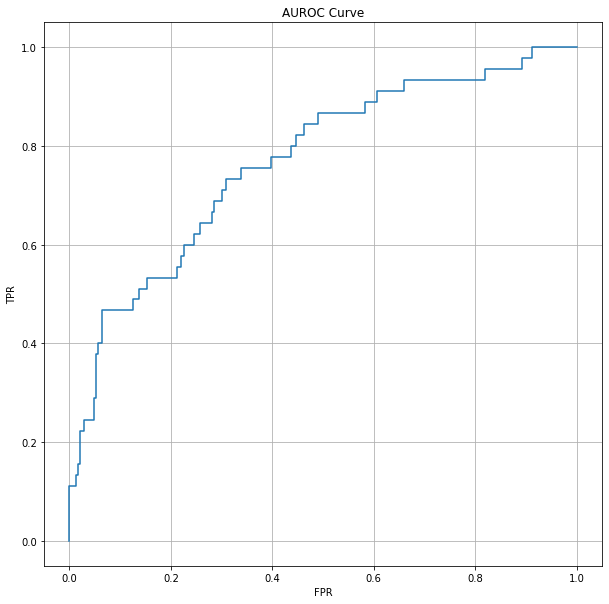

In [52]:
plt.figure(figsize=(10,10))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr,label="LogRegmodel(Area=%.2f)" %log_roc_auc)
plt.title("AUROC Curve")
plt.grid()

In [53]:
from sklearn.metrics import f1_score

In [54]:
F1=f1_score(att_test_y,pred)            #F1-SCORE

In [55]:
F1

0.2456140350877193

# With Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
dt.fit(att_train_x,att_train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
pred_dt=dt.predict(att_test_x)

In [60]:
pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
tabel_dt=confusion_matrix(pred_dt,att_test_y)

In [62]:
tabel_dt

array([[245,  39],
       [  4,   6]], dtype=int64)

In [63]:
Accuracy=tabel_dt.diagonal().sum()/tabel_dt.sum()*100       #Accuracy with Decision Tree

In [64]:
Accuracy

85.37414965986395

In [65]:
F1=f1_score(att_test_y,pred_dt)  #F1-score

In [66]:
F1

0.2181818181818182

In [67]:
att_x_train_names=att_train_x.columns

In [68]:
att_x_train_names

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [69]:
dt.feature_importances_

array([0.1111971 , 0.        , 0.        , 0.        , 0.0780422 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25182994, 0.        , 0.09858097,
       0.        , 0.30236817, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15798163, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [70]:
dt.feature_importances_.sum()

1.0

In [71]:
feature_importance=pd.DataFrame({"Feature_name":att_train_x.columns, "Importance": list(dt.feature_importances_)})

In [72]:
feature_importance

,Feature_name,Importance
0,Age,0.111197
1,BusinessTravel,0.000000
2,DailyRate,0.000000
3,Department,0.000000
4,DistanceFromHome,0.078042
5,Education,0.000000
6,EducationField,0.000000
7,EmployeeCount,0.000000
8,EmployeeNumber,0.000000
9,EnvironmentSatisfaction,0.000000


In [73]:
feature_importance = feature_importance.sort_values("Importance", ascending=False)
feature_importance

,Feature_name,Importance
21,OverTime,0.302368
17,MonthlyIncome,0.251830
27,TotalWorkingYears,0.157982
0,Age,0.111197
19,NumCompaniesWorked,0.098581
4,DistanceFromHome,0.078042
6,EducationField,0.000000
7,EmployeeCount,0.000000
32,YearsSinceLastPromotion,0.000000
31,YearsInCurrentRole,0.000000


In [74]:
from pandas import DataFrame,Series
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline


C:\Users\vidhiandshruti\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [75]:
def plot_decision_tree (dt,feature_name,target_name):
    dot_data=StringIO()
    tree.export_graphviz(dt, out_file=dot_data,filled=True, rounded=True,feature_names=att_x_train_names,
                special_characters =True)

    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [76]:
x_train=att.loc[:,att.columns !='Attrition']

In [77]:
y_train=att.Attrition

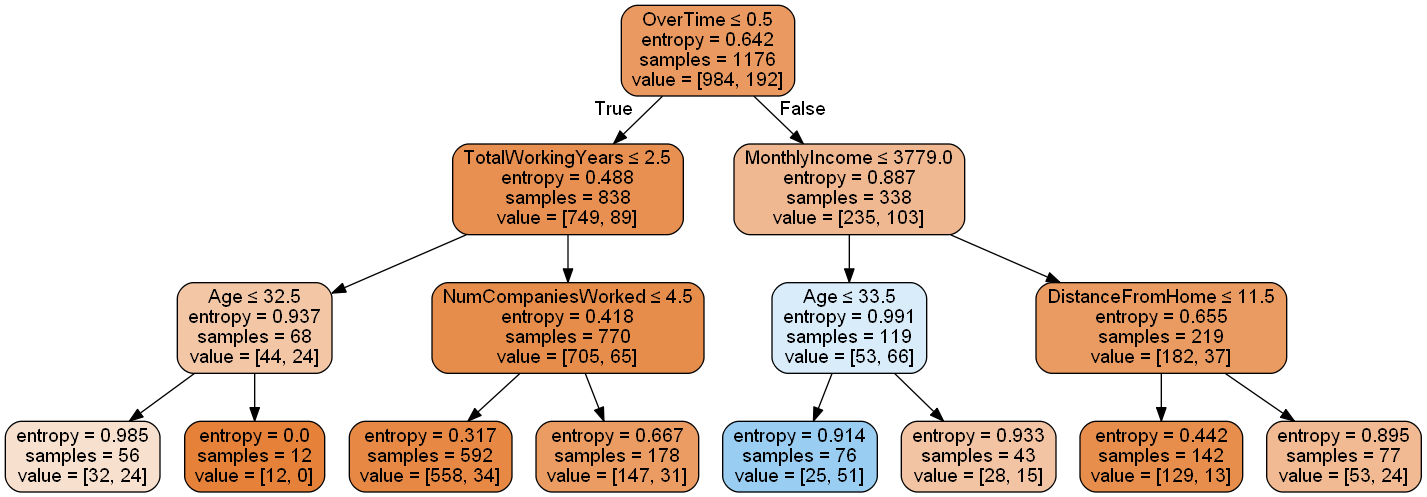

<Figure size 864x864 with 0 Axes>

In [78]:
fig=plt.figure(figsize=(12,12))
plot_decision_tree(dt,x_train.columns,att.columns[0])

#  With Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf=RandomForestClassifier()

In [81]:
rf.fit(att_train_x,att_train_y)

C:\Users\vidhiandshruti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
pred_rf=rf.predict(att_test_x)

In [83]:
tab_ref=confusion_matrix(pred_rf,att_test_y)

In [84]:
tab_ref

array([[245,  35],
       [  4,  10]], dtype=int64)

In [85]:
Accuracy=tab_ref.diagonal().sum()/tab_ref.sum()*100             #Accuracy with Random Forest

In [86]:
Accuracy

86.73469387755102

In [87]:
F1=f1_score(att_test_y,pred_rf)    #F1-Score

In [88]:
F1

0.3389830508474576

# With Adaptive Boosting

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
abc=AdaBoostClassifier(DecisionTreeClassifier())

In [91]:
abc.fit(att_train_x,att_train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [92]:
pred_boost=abc.predict(att_test_x)

In [93]:
pred_boost

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [94]:
tab_boost=confusion_matrix(pred_boost,att_test_y)

In [95]:
tab_boost

array([[212,  35],
       [ 37,  10]], dtype=int64)

In [96]:
Accuracy=tab_boost.diagonal().sum()/tab_boost.sum()*100       #Accuracy wih Adaptive Boosting

In [97]:
Accuracy

75.51020408163265

In [98]:
F1=f1_score(att_test_y,pred_boost)   

In [99]:
F1          #F1-Score

0.2173913043478261